In [37]:
from elqm.retrieval import retrieve, extract_keywords_from_question
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
example_questions = json.load(open("example_questions.json", "r"))

In [39]:
keywords_list = []

for question in example_questions:
    keywords_list.append(extract_keywords_from_question(question))

In [40]:
for question, keywords in zip(example_questions, keywords_list):
    print(question)
    # Sort by score
    for kw in keywords:
        print(kw)
    print()

How loud are air conditioners allowed to be in urban areas in Germany?
conditioners allowed
urban areas
air conditioners
loud
Germany

Who can verify the financial operations of the Nuclear Safety Account?
Safety Account
financial operations
Nuclear Safety
Nuclear Safety Account
Account
Nuclear

Let's say a member state makes a change to an emergency plan regarding the gas supply. What does it need to do? Does it need to notify anyone?
gas supply
state makes
member
emergency plan
supply
member state

How does the Renewable Energy Directive (2009/28/EC) define 'renewable energy sources' and what are the compliance requirements for EU Member States in terms of renewable energy targets for 2030?
Energy Directive
compliance
Renewable Energy Directive
Member States
renewable energy sources
renewable energy targets
EU Member States
energy sources'
energy targets
Renewable Energy

In the context of the Guidelines on State aid for environmental protection and energy 2014-2020 (2014/C 200/01), 

In [67]:
question_id = -4

In [68]:
example_questions[question_id]

'In the EU’s Hydrogen Strategy, what are the guidelines and regulatory measures proposed for the development and integration of hydrogen energy into the European energy market?'

In [69]:
hits = retrieve(example_questions[question_id])

In [70]:
for hit in hits:
    # Print the score
    print(hit['_score'])

26.528193
20.024267
19.565062
18.540485
17.765238
17.736
16.094416
15.628998
15.499712
15.434145


In [73]:
n_examples = len(example_questions)
COLS = 4
ROWS = int(np.ceil(n_examples / COLS))

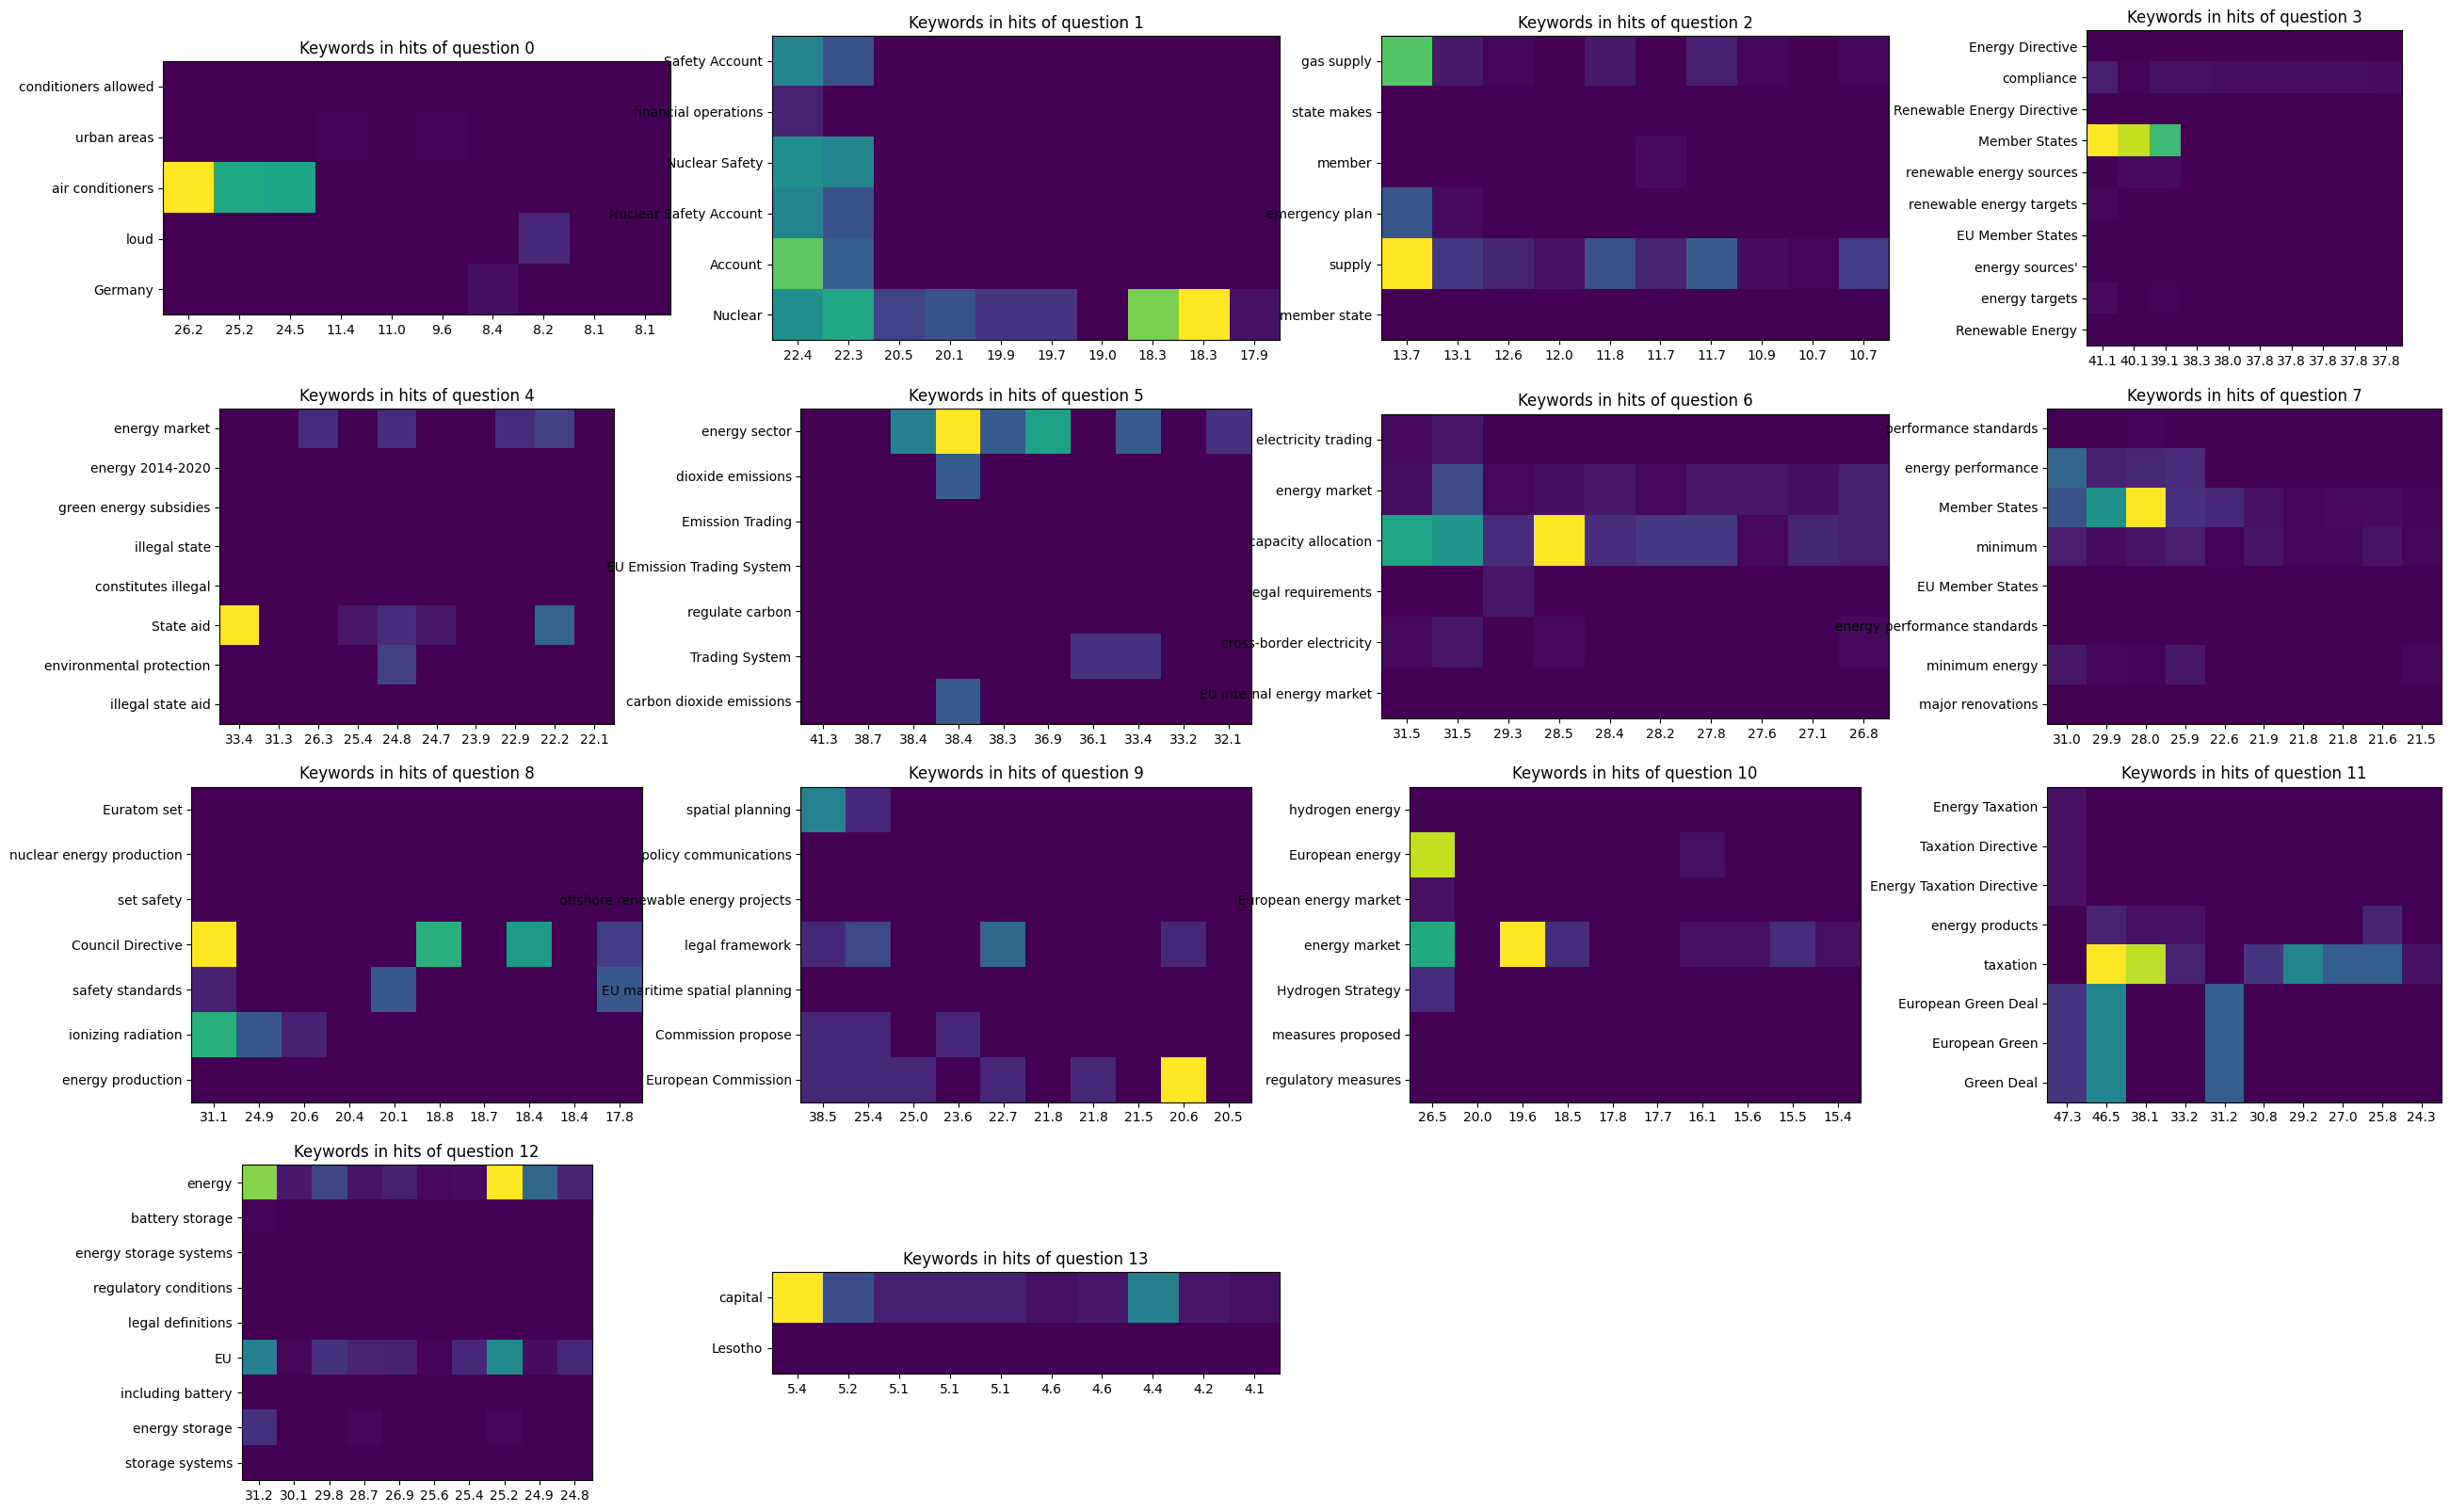

In [87]:
fig, axes = plt.subplots(ROWS, COLS, figsize=(COLS * 8, ROWS * 5))

for i, (ax, example_question) in enumerate(zip(axes.flatten(), example_questions)):
    hits = retrieve(example_questions[i])

    # Show a matrix of which keywords are in which hit of the first question
    keywords_hit_df = pd.DataFrame(index=['score'] + keywords_list[i], columns=range(len(hits)))
    keywords_hit_df.loc['score'] = np.round([hit['_score'] for hit in hits], 1)

    for hit_idx, hit in enumerate(hits):
        for kw in keywords_list[i]:
            keywords_hit_df.loc[kw, hit_idx] = hit['_source']['text'].count(kw)

    # Plot the matrix
    ax.imshow(keywords_hit_df.iloc[1:].astype(int), cmap='viridis')
    ax.set_yticks(range(len(keywords_list[i])))
    ax.set_yticklabels(keywords_list[i]);
    ax.set_title(f'Keywords in hits of question {i}')

    # Set the xticks to the scores of the hits
    ax.set_xticks(range(len(hits)))
    ax.set_xticklabels(list(keywords_hit_df.loc['score'].astype(float)))

# Remove the empty plots
for ax in axes.flatten()[n_examples:]:
    ax.remove()